Dataset Loaded Successfully!
         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East        30895
4  2024-01-05      Laptop         8  39835     CUST005  North       318680

Columns: Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')

Missing Values:
 Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64


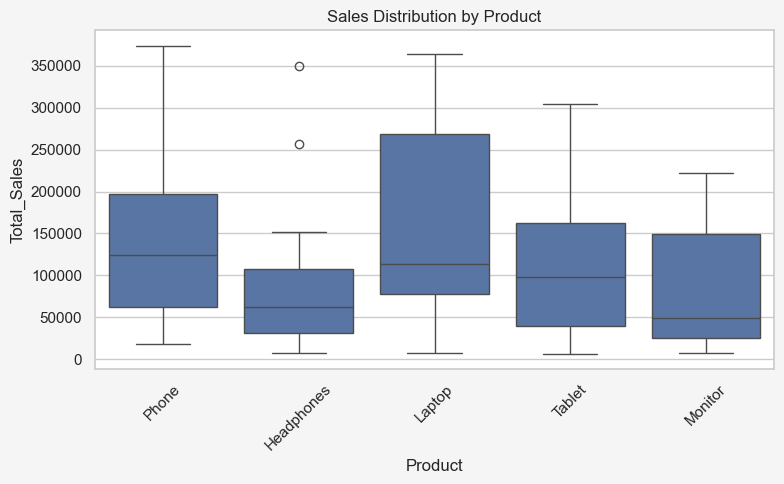

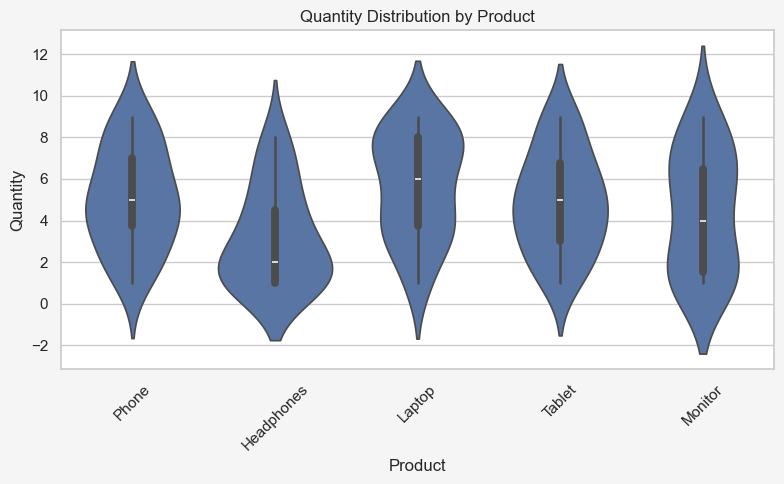

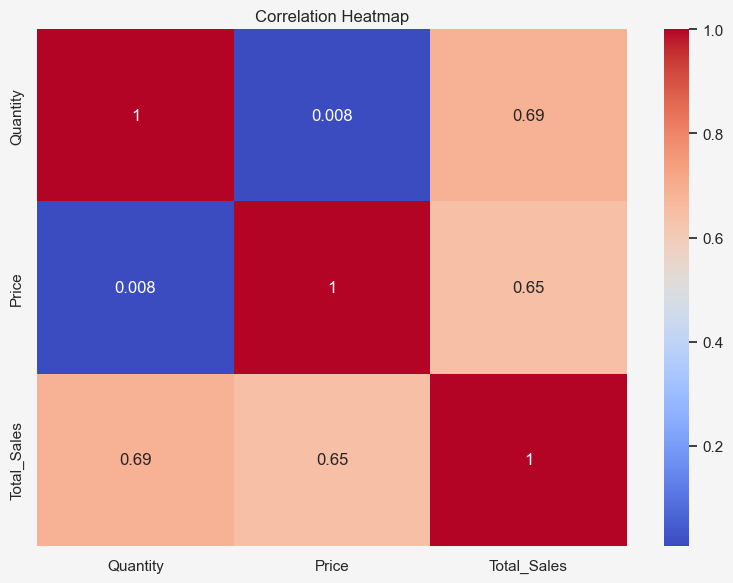

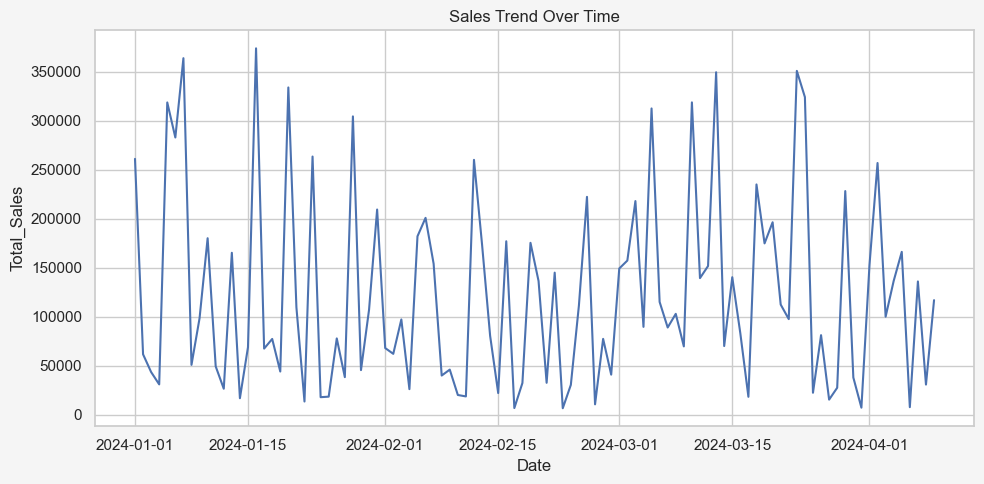

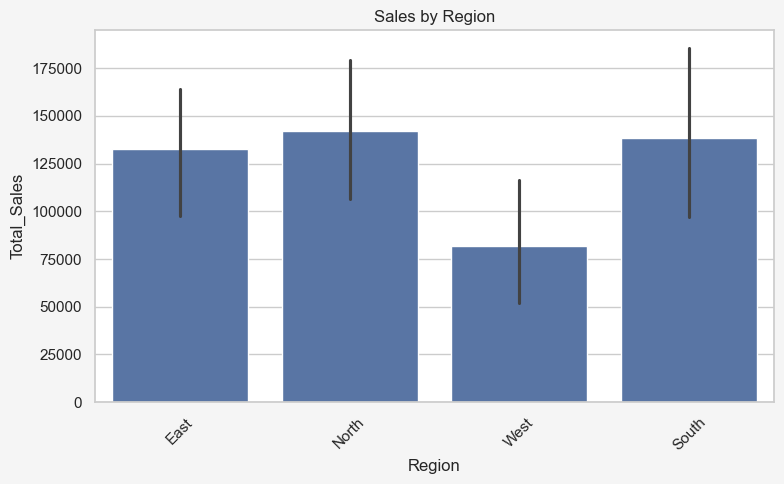

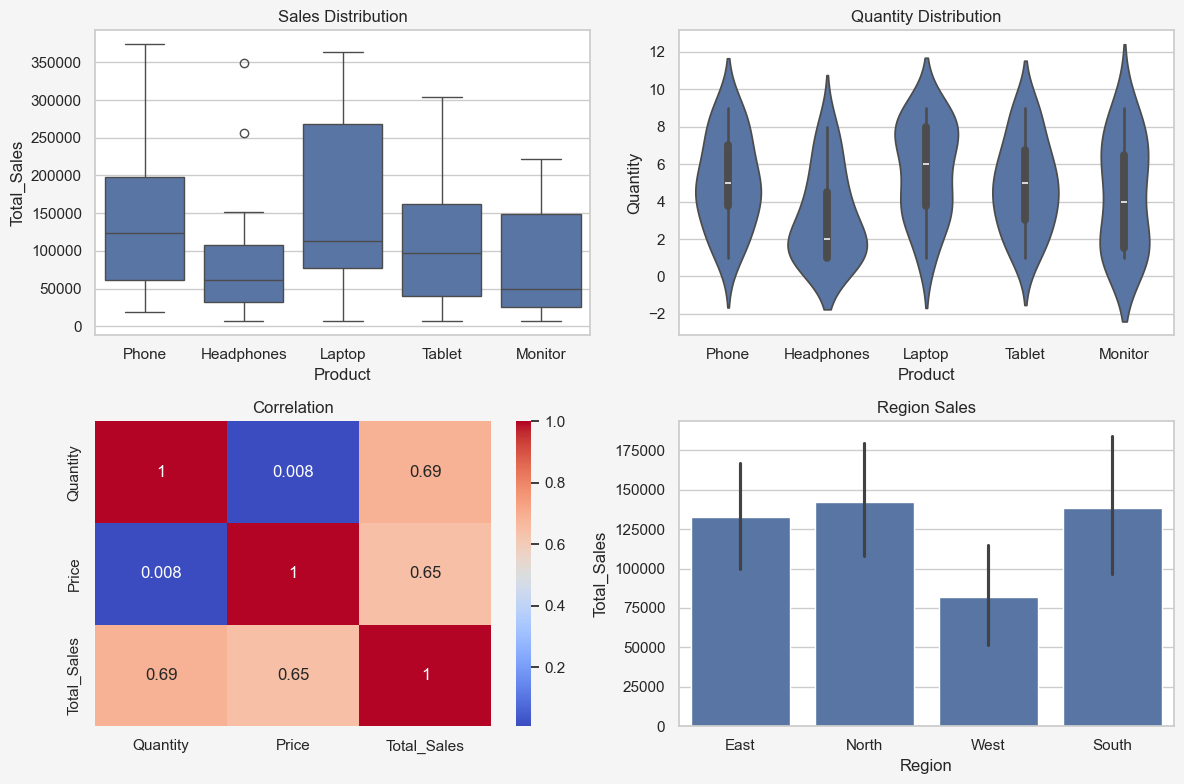

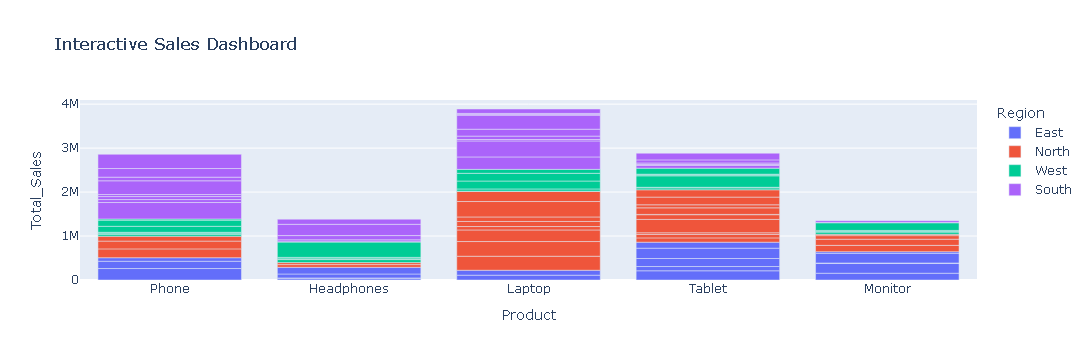


Dashboard Created Successfully!


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv("sales_data.csv")

print("Dataset Loaded Successfully!")
print(df.head())
print("\nColumns:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'])

sns.set_theme(style="whitegrid")
plt.rcParams['figure.facecolor'] = '#f5f5f5'

# 2. Box Plot – Sales by Product

plt.figure(figsize=(8,5))
sns.boxplot(x='Product', y='Total_Sales', data=df)
plt.xticks(rotation=45)
plt.title("Sales Distribution by Product")
plt.tight_layout()
plt.savefig("visualizations/boxplot.png")
plt.show()


# 3. Violin Plot – Quantity Distribution

plt.figure(figsize=(8,5))
sns.violinplot(x='Product', y='Quantity', data=df)
plt.xticks(rotation=45)
plt.title("Quantity Distribution by Product")
plt.tight_layout()
plt.savefig("visualizations/violinplot.png")
plt.show()


# 4. Correlation Heatmap

plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("visualizations/heatmap.png")
plt.show()


# 5. Sales Trend Over Time

sales_trend = df.groupby('Date')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Total_Sales', data=sales_trend)
plt.title("Sales Trend Over Time")
plt.tight_layout()
plt.savefig("visualizations/sales_trend.png")
plt.show()


# 6. Region-wise Sales (Segmentation)

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total_Sales', data=df)
plt.xticks(rotation=45)
plt.title("Sales by Region")
plt.tight_layout()
plt.savefig("visualizations/region_sales.png")
plt.show()


# 7. 2x2 Dashboard Layout

fig, axes = plt.subplots(2,2, figsize=(12,8))

sns.boxplot(x='Product', y='Total_Sales', data=df, ax=axes[0,0])
axes[0,0].set_title("Sales Distribution")

sns.violinplot(x='Product', y='Quantity', data=df, ax=axes[0,1])
axes[0,1].set_title("Quantity Distribution")

sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1,0])
axes[1,0].set_title("Correlation")

sns.barplot(x='Region', y='Total_Sales', data=df, ax=axes[1,1])
axes[1,1].set_title("Region Sales")

plt.tight_layout()
plt.savefig("visualizations/dashboard_layout.png")
plt.show()


# 8. Interactive Plotly Chart

fig = px.bar(
    df,
    x='Product',
    y='Total_Sales',
    color='Region',
    title="Interactive Sales Dashboard",
    hover_data=['Quantity', 'Price']
)

fig.show()

print("\nDashboard Created Successfully!")